In [550]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
from scipy import stats, optimize, interpolate

figure_directory = '../report/figures/'


## Function Definitions

In [551]:
def t1_func(x, M0, tau, c):
     return M0 * (1 - 2* np.exp(-x/tau))  + c 


def t2_func(x, M0, tau, c):
     return M0 * np.exp(-2*x/tau)  + c 

In [552]:
def t1_plot(data, name = 'Chemical Species',inital_params = [4.7, 30, 0.32],eq_location = (20,-2), trunc_t1 = 5, trunc_errT1 = 2):
    plt.style.use('seaborn')
    plt.rcParams['font.family'] = 'serif'

    fig, ax = plt.subplots()

    nmr = data.dropna() 
    nmr.columns = ['time','amplitude'] # ms and V

    ax.scatter(x=nmr['time'], y =nmr["amplitude"], label= 'Data',color='cornflowerblue')

    ### Plotting the Fit
    
    fit_params, pcov = scipy.optimize.curve_fit(t1_func, nmr["time"], nmr["amplitude"], p0 = inital_params)
    error_df = pd.DataFrame(pcov, columns=["amp", "time", "shift"])

    fit_x = np.linspace(nmr["time"].min(), nmr["time"].max(), 100)
    fit_y = t1_func(fit_x, fit_params[0], fit_params[1], fit_params[2])

    tau = fit_params[1]
    tauerr = np.sqrt(error_df["time"][1])
    
    ax.plot(fit_x,fit_y,label = "Fitted Curve")
    #plt.axhline(y=0, color="darkblue", linestyle = '--')
    
    #ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.set_title('T$_1$ measurement of ' + name, fontsize = 24)
    ax.set_xlabel('Delay Time (ms)', fontsize = 24)
    ax.set_ylabel('Pulse Amplitude (V)', fontsize = 24)
    ax.tick_params(axis='both', labelsize = 20)
    ax.legend(fontsize = 20)

    max_mag = str(round(fit_params[0],2))
    offset = str(round(fit_params[2],2))
    equation = 'M$_z$(t) = ' + max_mag + r'(1$-$2$exp[\frac{-t}{T_1}]$)$+$' + offset
    ax.annotate(equation +'\n'+'T$_1$ = ' + str(tau)[0:trunc_t1] + '$\pm$' + str(tauerr)[0:trunc_errT1] + ' ms',xy=eq_location, fontsize = 20)

    return fig, tau, tauerr

In [553]:
def t2_plot(data, name = 'Chemical Species',inital_params = [4.7, 30, 0.32],eq_location = (60,3), trunc_t2 = 5, trunc_errT2 = 2, method = ' Meiboom-Gill'):
    plt.style.use('seaborn')
    plt.rcParams['font.family'] = 'serif'

    fig, ax = plt.subplots()

    nmr = data.dropna()
    nmr.columns = ['time','amplitude'] # ms and V

    ax.scatter(x=nmr['time'], y =nmr["amplitude"], label= 'Data',color='firebrick')

    ### Plotting the Fit
    
    fit_params, pcov = scipy.optimize.curve_fit(t2_func, nmr["time"], nmr["amplitude"], p0 = inital_params)
    error_df = pd.DataFrame(pcov, columns=["amp", "time", "shift"])

    fit_x = np.linspace(nmr["time"].min(), nmr["time"].max(), 100)
    fit_y = t2_func(fit_x, fit_params[0], fit_params[1], fit_params[2])

    tau = fit_params[1]
    tauerr = np.sqrt(error_df["time"][1])
    
    ax.plot(fit_x,fit_y,label = "Fitted Curve")

    #ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.set_title(method + ' T$_2$ measurement of ' + name, fontsize = 24)
    ax.set_xlabel('Time (ms)', fontsize = 24)
    ax.set_ylabel('Pulse Amplitude (V)', fontsize = 24)
    ax.tick_params(axis='both', labelsize = 20)
    ax.legend(fontsize = 20)

    max_mag = str(round(fit_params[0],2))
    offset = str(round(fit_params[2],2))
    equation = 'M$_z$(t) = ' + max_mag + r'$exp[\frac{-2t}{T_2}]+$' + offset
    ax.annotate(equation +'\n'+'T$_2$ = ' + str(tau)[0:trunc_t2] + '$\pm$' + str(tauerr)[0:trunc_errT2] + ' ms',xy=eq_location, fontsize = 20)

    return fig , tau, tauerr

/tmp/ipykernel_30063/650393093.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar =  fig.colorbar(CS)


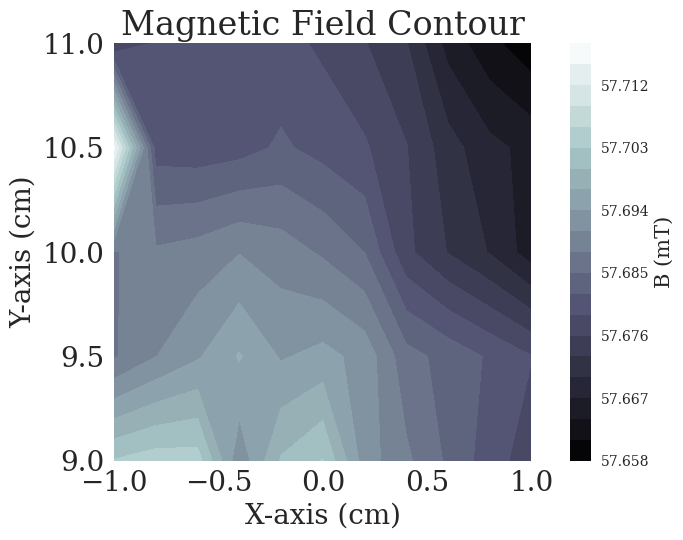

In [607]:
def mag_plot(data):
    df = pd.read_csv(data)
    x = np.linspace(-1,1,11)
    z = np.linspace(9,11,5)

    X, Y = np.meshgrid(x,z)
    field = df['mT'].to_numpy().reshape(5,11)


    fig, ax = plt.subplots()

    CS = ax.contourf( X, Y , field, 20, cmap=plt.cm.bone)

    cbar =  fig.colorbar(CS)
    cbar.set_label('B (mT)', fontsize = 15)

    ax.set_title('Magnetic Field Contour', fontsize = 24)
    ax.set_aspect('equal')
    ax.set_xlabel('X-axis (cm)', fontsize = 20)
    ax.set_ylabel('Y-axis (cm)', fontsize = 20)
    ax.tick_params(axis='both', labelsize = 20)
    
    return fig



mag_out = mag_plot('Mag_Field.csv')
mag_out.set_tight_layout(True)
mag_out.savefig(figure_directory  + 'mag_field.pgf')


## Mineral Oil

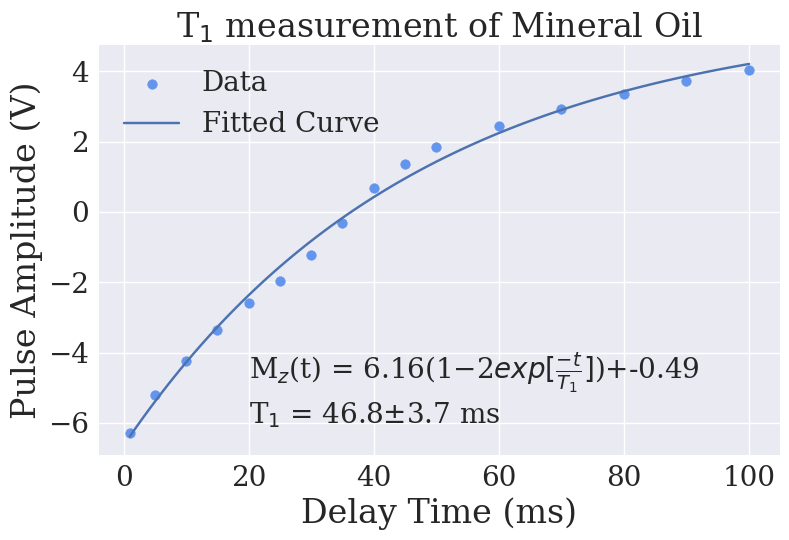

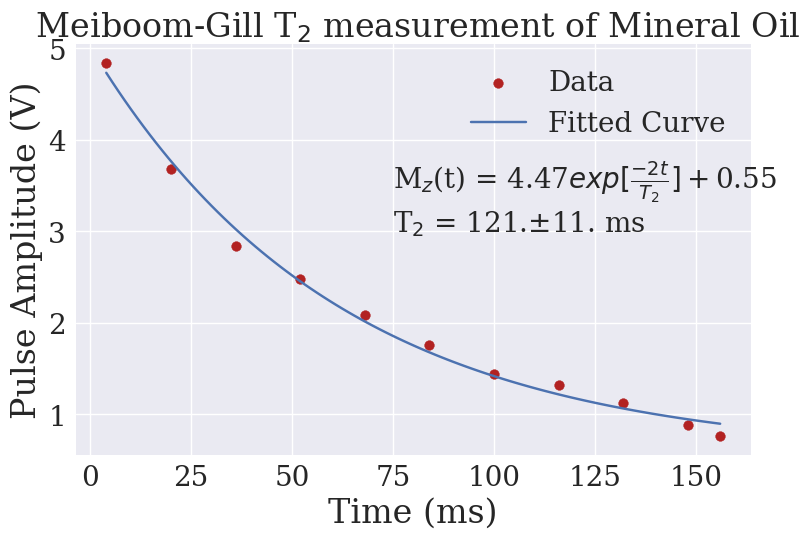

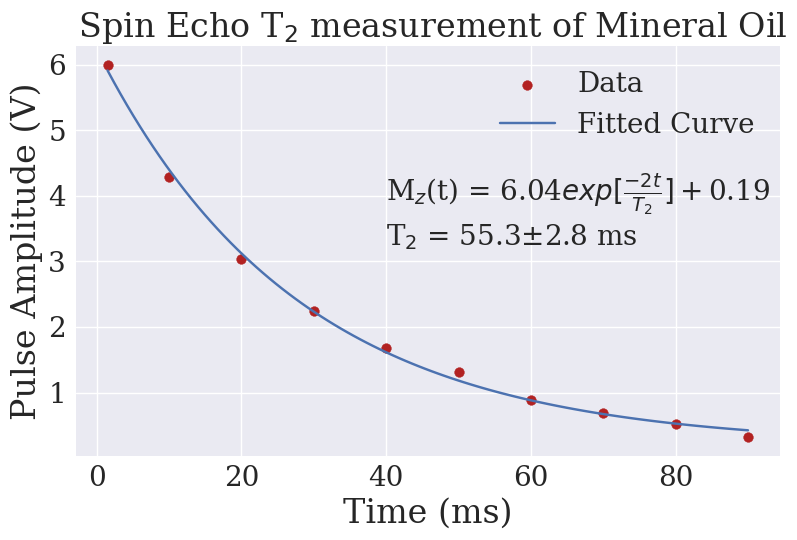

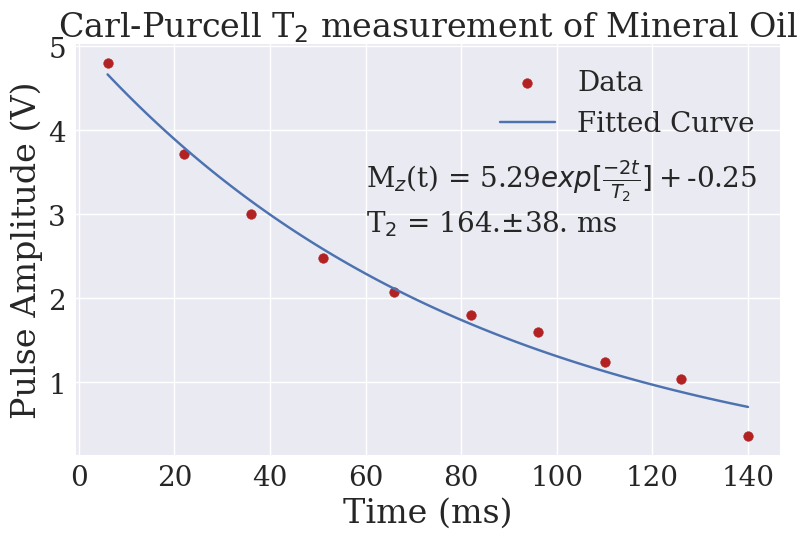

In [555]:
raw_data = pd.read_csv("mineral_oil.csv")

name = 'Mineral Oil'
fname = 'mineral_oil'
init_params = [4.7, 30, 0.32]
data_t1 = raw_data[['T1 Time (ms)', "T1 Amplitude (V)"]].copy()
data_t2 = raw_data[['T2MG Time (ms) DT:4', 'T2MG Amplitude (V) NP:60']].copy()
spinEcho = raw_data[['T2SE Time (ms) DT:5', 'T2SE Amplitude ']].copy()
carlPurcell = raw_data[['T2CP Time (ms) DT:5', 'T2CP Amplitude (V) NP:80']].copy()


out_fig_t1, tau_t1, tauerr_t1 = t1_plot(data_t1, name, init_params,eq_location=(20,-6), trunc_t1=4, trunc_errT1=3)
out_fig_t2, tau_t2, tauerr_t2 = t2_plot(data_t2,name,init_params,eq_location=(75,3), trunc_t2=4, trunc_errT2=3)


out_spinEcho, tau_t2, tauerr_t2 = t2_plot(spinEcho, name, init_params, eq_location=(40,3.25), trunc_t2= 4, trunc_errT2=3, method=' Spin Echo')
out_carlPurcell, tau_t2, tauerr_t2 = t2_plot(carlPurcell,name, [4.7, 80, 0.32], eq_location=(60,2.8), trunc_t2= 4, trunc_errT2=3, method='Carl-Purcell')

out_fig_t1.set_tight_layout(True)
out_fig_t2.set_tight_layout(True)
out_spinEcho.set_tight_layout(True)
out_carlPurcell.set_tight_layout(True)

out_fig_t1.savefig(figure_directory + fname + '_T1.pgf')
out_fig_t2.savefig(figure_directory + fname + '_T2.pgf')
out_spinEcho.savefig(figure_directory + fname + '_spinEcho.pgf')
out_carlPurcell.savefig(figure_directory + fname + '_carlPurcell.pgf')


## $CuCuSO_{4} \boldsymbol{\cdot} H_2 O$

In [556]:
cuso4_T1 = np.array([0.0,0.0,0,0,0,0,0])
cuso4_T1_err = np.array([0.0,0,0,0,0,0,0])
cuso4_T2 = np.array([0.0,0,0,0,0,0,0])
cuso4_T2_err = np.array([0.0,0,0,0,0,0,0])

#### 0.005 M

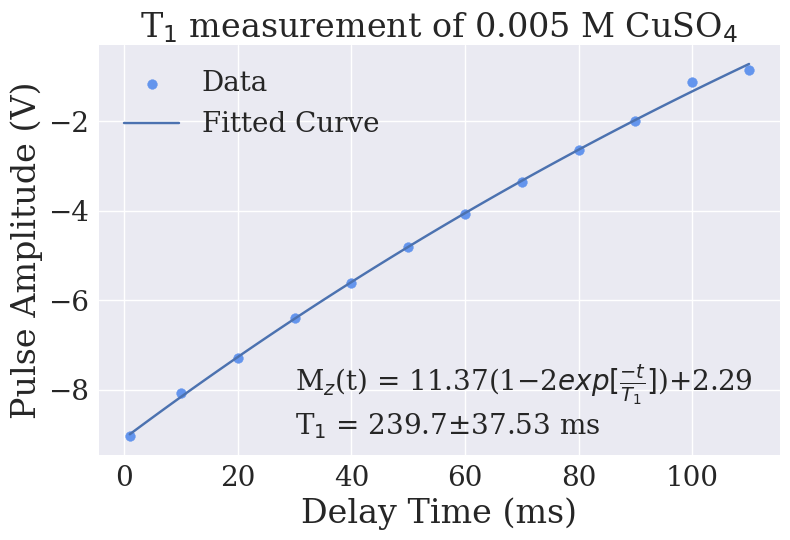

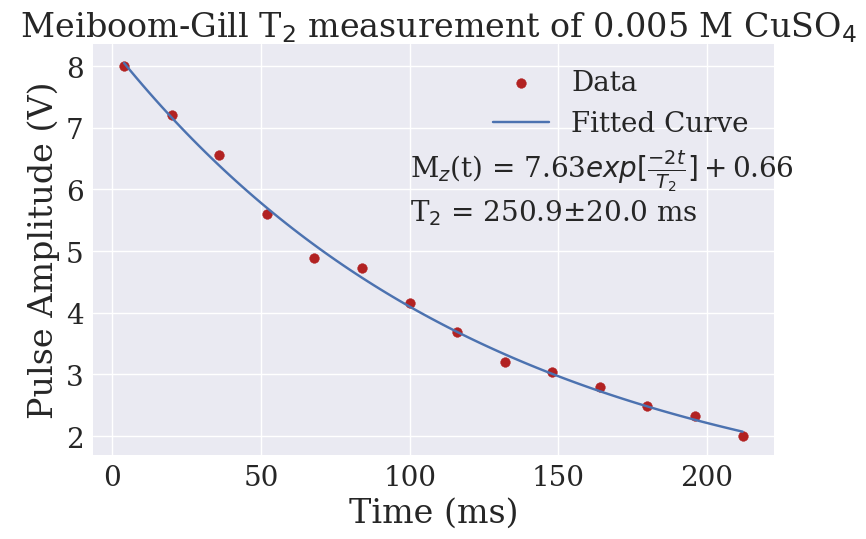

In [557]:
raw_data = pd.read_csv("0d005M.csv")
data_t1 = raw_data[['T1 Time (ms)', "T1 Amp - 320mv "]].copy()
data_t2 = raw_data[['T2 Time (ms) DT:4', 'T2 Amp - 320mv']].copy()

## setting useful parameters for plots
name = '0.005 M CuSO$_4$'
fname = 'CuSO4_0d005'
init_params = [4.7, 150, 0.32]
location_t1 = (30, -9)
location_t2 = (100, 5.5)
truncation_t1 = 5
truncation_t1err = 5
truncation_t2 = 5
truncation_t2err = 4
place = 0


##################### No Need To Change ###########################

## creating figures and getting T-values
out_fig_t1, t1, t1err = t1_plot(data_t1, name, init_params,eq_location= location_t1,trunc_t1 = truncation_t1, trunc_errT1 = truncation_t1err)
out_fig_t2, t2, t2err = t2_plot(data_t2,name,init_params,eq_location= location_t2, trunc_t2 = truncation_t2, trunc_errT2 = truncation_t2err)

## storing T-values for a later plot
cuso4_T1[place] = t1
cuso4_T1_err[place] = t1err
cuso4_T2[place] = t2
cuso4_T2_err[place] = t2err

## Preparing figure for paper
out_fig_t1.set_tight_layout(True)
out_fig_t2.set_tight_layout(True)

## Saving Figure
out_fig_t1.savefig(figure_directory + fname + '_T1.pgf')
out_fig_t2.savefig(figure_directory + fname + '_T2.pgf')

#### 0.01 M

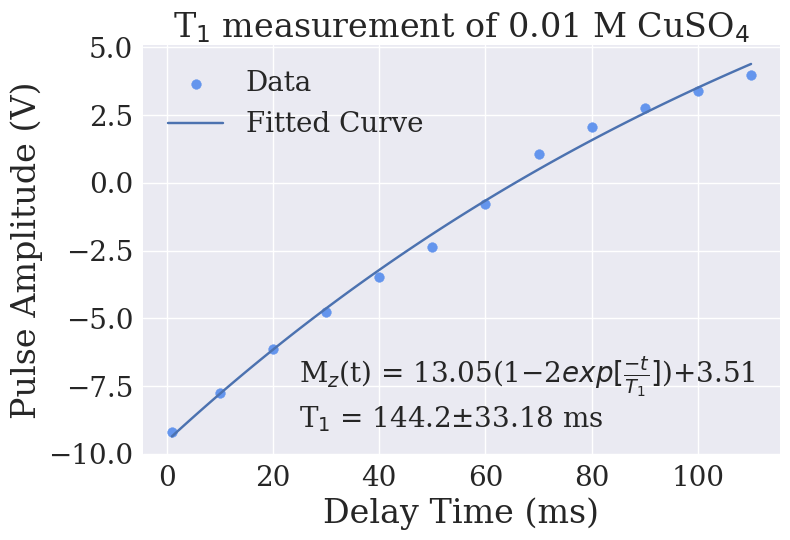

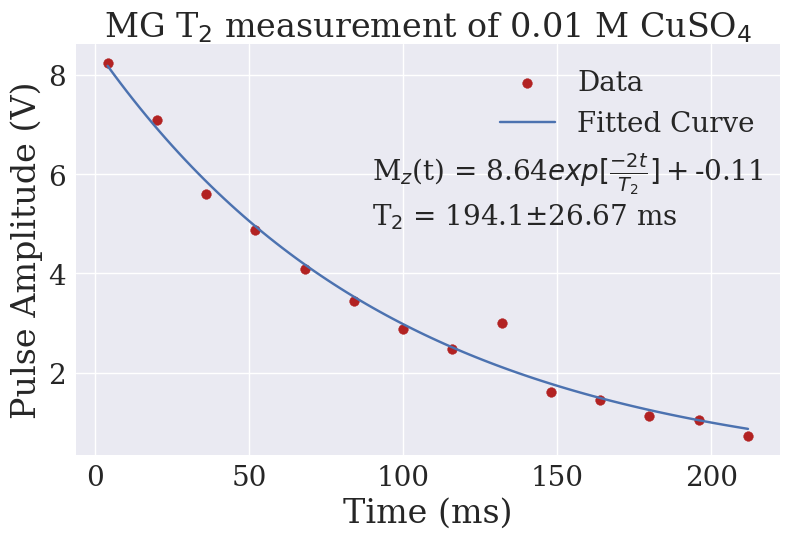

In [558]:
raw_data = pd.read_csv("0d01M.csv")
data_t1 = raw_data[['T1 Time (ms)', "T1 Amp - 320mv "]].copy()
data_t2 = raw_data[['T2 Time (ms) DT:4', 'T2 Amp - 320mv']].copy()

## setting parameters for plots
name = '0.01 M CuSO$_4$'
fname = 'CuSO4_0d01'
init_params = [4.7, 100, 0.32]
location_t1 = (25, -9)
location_t2 = (90, 5.0)
truncation_t1 = 5
truncation_t1err = 5
truncation_t2 = 5
truncation_t2err = 5
place = 1


##################### No Need To Change ###########################

## creating figures and getting T-values
out_fig_t1, t1, t1err = t1_plot(data_t1, name, init_params,eq_location= location_t1,trunc_t1 = truncation_t1, trunc_errT1 = truncation_t1err)
out_fig_t2, t2, t2err = t2_plot(data_t2,name,init_params,eq_location= location_t2, trunc_t2 = truncation_t2, trunc_errT2 = truncation_t2err, method='MG')

## storing T-values for a later plot
cuso4_T1[place] = t1
cuso4_T1_err[place] = t1err
cuso4_T2[place] = t2
cuso4_T2_err[place] = t2err

## Preparing figure for paper
out_fig_t1.set_tight_layout(True)
out_fig_t2.set_tight_layout(True)

## Saving Figure
out_fig_t1.savefig(figure_directory + fname + '_T1.pgf')
out_fig_t2.savefig(figure_directory + fname + '_T2.pgf')

#### 0.05 M


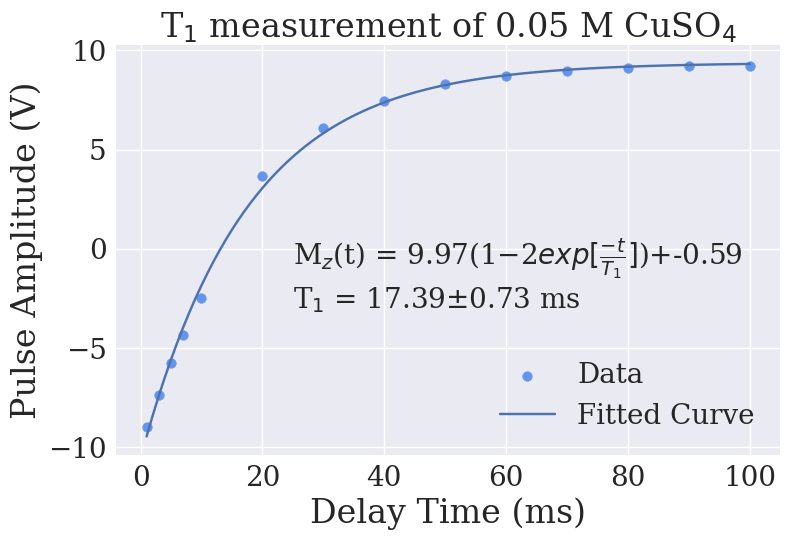

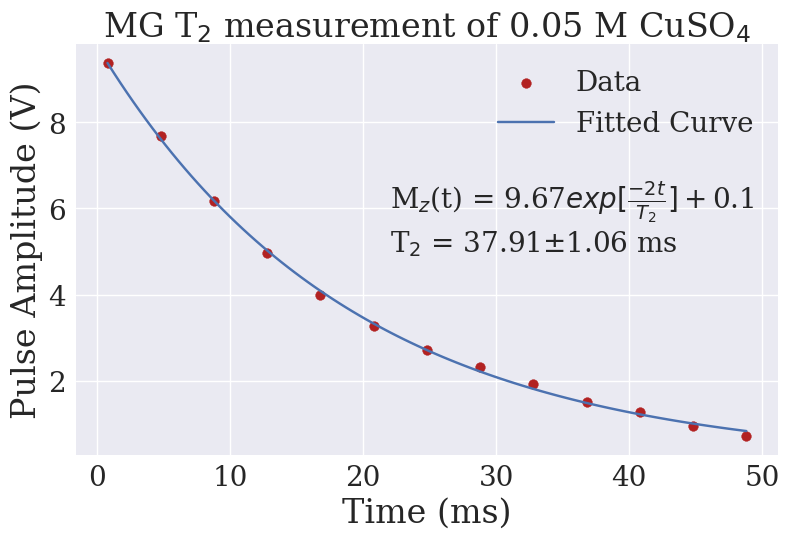

In [559]:
raw_data = pd.read_csv("0d05M.csv")
data_t1 = raw_data[['T1 Time (ms)', "T1 Amp - 320mv "]].copy()
data_t2 = raw_data[['T2 Time (ms) DT:1', 'T2 Amp - 320mv']].copy()

## setting parameters for plots
name = '0.05 M CuSO$_4$'
fname = 'CuSO4_0d05'
init_params = [4.7, 17.5, 0.32]
location_t1 = (25, -3)
location_t2 = (22, 5.0)
truncation_t1 = 5
truncation_t1err = 4
truncation_t2 = 5
truncation_t2err = 4
place = 2


##################### No Need To Change ###########################

## creating figures and getting T-values
out_fig_t1, t1, t1err = t1_plot(data_t1, name, init_params,eq_location= location_t1,trunc_t1 = truncation_t1, trunc_errT1 = truncation_t1err)
out_fig_t2, t2, t2err = t2_plot(data_t2,name,init_params,eq_location= location_t2, trunc_t2 = truncation_t2, trunc_errT2 = truncation_t2err, method='MG')

## storing T-values for a later plot
cuso4_T1[place] = t1
cuso4_T1_err[place] = t1err
cuso4_T2[place] = t2
cuso4_T2_err[place] = t2err

## Preparing figure for paper
out_fig_t1.set_tight_layout(True)
out_fig_t2.set_tight_layout(True)

## Saving Figure
out_fig_t1.savefig(figure_directory + fname + '_T1.pgf')
out_fig_t2.savefig(figure_directory + fname + '_T2.pgf')

#### 0.1 M


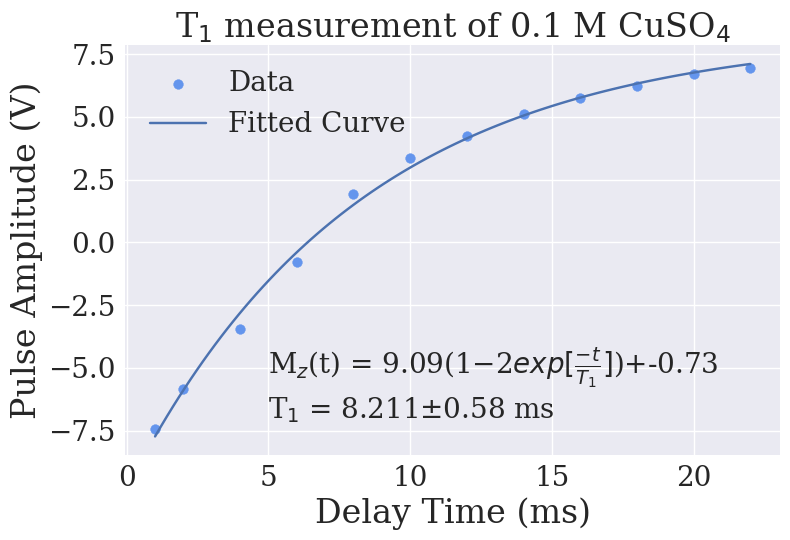

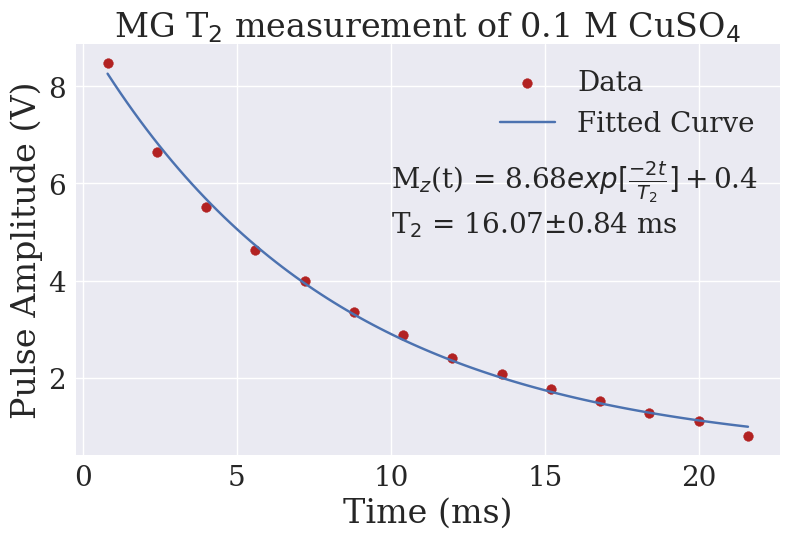

In [560]:
raw_data = pd.read_csv("0d1M.csv")
data_t1 = raw_data[['T1 Time (ms)', "T1 Amp - 320mv "]].copy()
data_t2 = raw_data[['T2 Time (ms) DT:0.8', 'T2 Amp - 320mv']].copy()

## setting parameters for plots
name = '0.1 M CuSO$_4$'
fname = 'CuSO4_0d1'
init_params = [4.7, 8, 0.32]
location_t1 = (5,-7)
location_t2 = (10, 5.0)
truncation_t1 = 5
truncation_t1err = 4
truncation_t2 = 5
truncation_t2err = 4
place = 3


##################### No Need To Change ###########################

## creating figures and getting T-values
out_fig_t1, t1, t1err = t1_plot(data_t1, name, init_params,eq_location= location_t1,trunc_t1 = truncation_t1, trunc_errT1 = truncation_t1err)
out_fig_t2, t2, t2err = t2_plot(data_t2,name,init_params,eq_location= location_t2, trunc_t2 = truncation_t2, trunc_errT2 = truncation_t2err, method='MG')

## storing T-values for a later plot
cuso4_T1[place] = t1
cuso4_T1_err[place] = t1err
cuso4_T2[place] = t2
cuso4_T2_err[place] = t2err

## Preparing figure for paper
out_fig_t1.set_tight_layout(True)
out_fig_t2.set_tight_layout(True)

## Saving Figure
out_fig_t1.savefig(figure_directory + fname + '_T1.pgf')
out_fig_t2.savefig(figure_directory + fname + '_T2.pgf')

#### 0.2 M


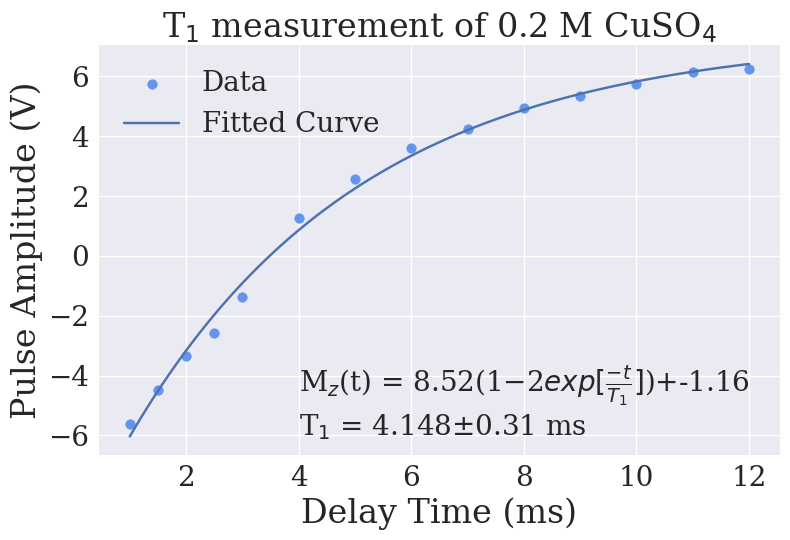

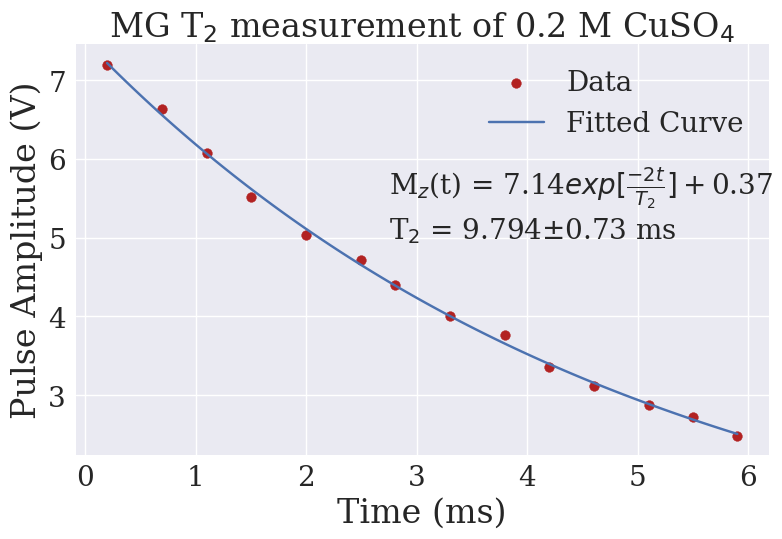

In [561]:
raw_data = pd.read_csv("0d2M.csv")
data_t1 = raw_data[['T1 Time (ms)', "T1 Amp - 320mv "]].copy()
data_t2 = raw_data[['T2 Time (ms) DT:0.8', 'T2 Amp - 320mv']].copy()

## setting parameters for plots
name = '0.2 M CuSO$_4$'
fname = 'CuSO4_0d2'
init_params = [4.7, 4.4, 0.32]
location_t1 = (4,-6)
location_t2 = (2.75, 5.0)
truncation_t1 = 5
truncation_t1err = 4
truncation_t2 = 5
truncation_t2err = 4
place = 4


##################### No Need To Change ###########################

## creating figures and getting T-values
out_fig_t1, t1, t1err = t1_plot(data_t1, name, init_params,eq_location= location_t1,trunc_t1 = truncation_t1, trunc_errT1 = truncation_t1err)
out_fig_t2, t2, t2err = t2_plot(data_t2,name,init_params,eq_location= location_t2, trunc_t2 = truncation_t2, trunc_errT2 = truncation_t2err, method='MG')

## storing T-values for a later plot
cuso4_T1[place] = t1
cuso4_T1_err[place] = t1err
cuso4_T2[place] = t2
cuso4_T2_err[place] = t2err

## Preparing figure for paper
out_fig_t1.set_tight_layout(True)
out_fig_t2.set_tight_layout(True)

## Saving Figure
out_fig_t1.savefig(figure_directory + fname + '_T1.pgf')
out_fig_t2.savefig(figure_directory + fname + '_T2.pgf')

#### 0.5 M


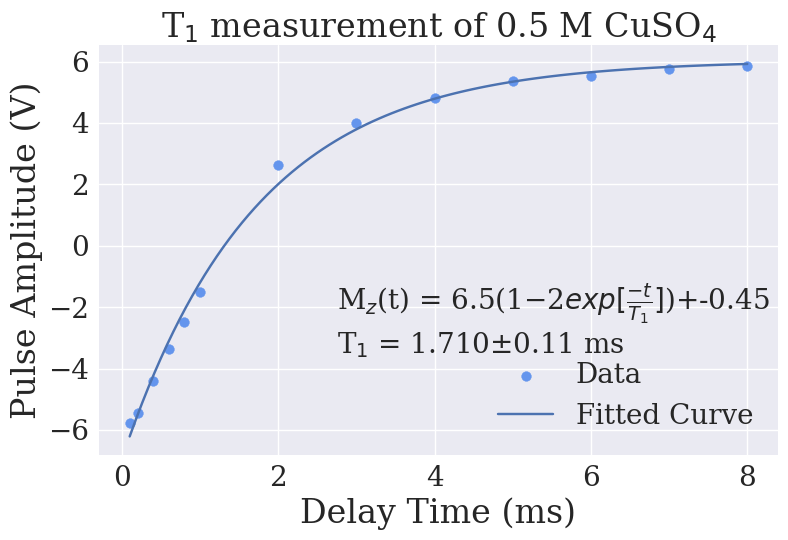

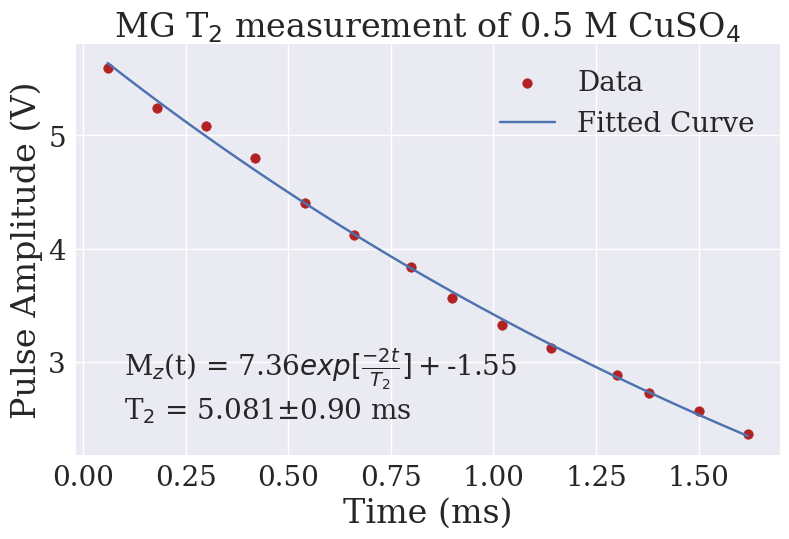

In [562]:
raw_data = pd.read_csv("0d5M.csv")
data_t1 = raw_data[['T1 Time (ms)', "T1 Amp - 320mv "]].copy()
data_t2 = raw_data[['T2 Time (ms) DT:0.8', 'T2 Amp - 320mv']].copy()

## setting parameters for plots
name = '0.5 M CuSO$_4$'
fname = 'CuSO4_0d5'
init_params = [4.7, 1, 0.32]
location_t1 = (2.75,-3.5)
location_t2 = (0.1, 2.5)
truncation_t1 = 5
truncation_t1err = 4
truncation_t2 = 5
truncation_t2err = 4
place = 5


##################### No Need To Change ###########################

## creating figures and getting T-values
out_fig_t1, t1, t1err = t1_plot(data_t1, name, init_params,eq_location= location_t1,trunc_t1 = truncation_t1, trunc_errT1 = truncation_t1err)
out_fig_t2, t2, t2err = t2_plot(data_t2,name,init_params,eq_location= location_t2, trunc_t2 = truncation_t2, trunc_errT2 = truncation_t2err, method='MG')

## storing T-values for a later plot
cuso4_T1[place] = t1
cuso4_T1_err[place] = t1err
cuso4_T2[place] = t2
cuso4_T2_err[place] = t2err

## Preparing figure for paper
out_fig_t1.set_tight_layout(True)
out_fig_t2.set_tight_layout(True)

## Saving Figure
out_fig_t1.savefig(figure_directory + fname + '_T1.pgf')
out_fig_t2.savefig(figure_directory + fname + '_T2.pgf')

#### 1 M


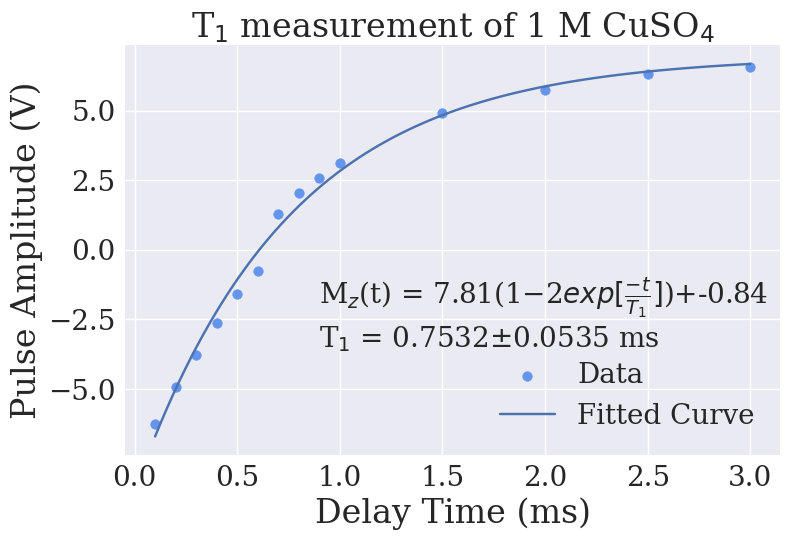

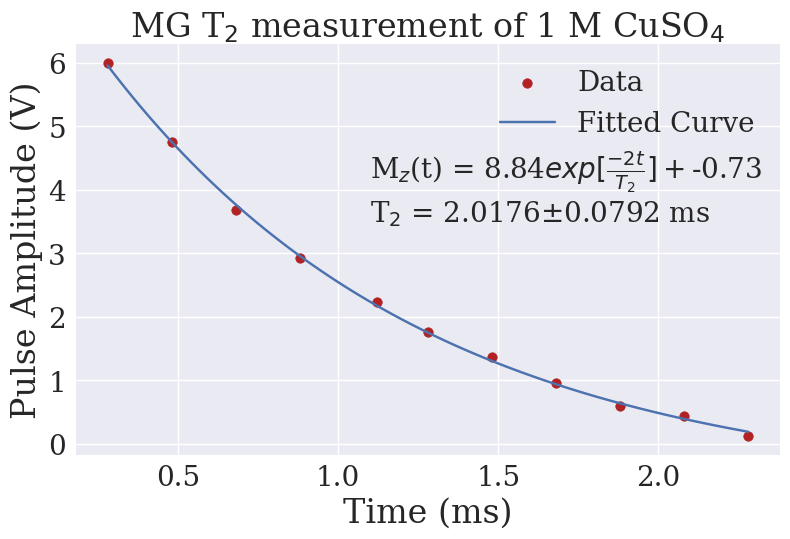

In [563]:
raw_data = pd.read_csv("1d0M.csv")
data_t1 = raw_data[['T1 Time (ms)', "T1 Amp - 280 mv "]].copy()
data_t2 = raw_data[['T2 Time (ms) DT:0.1', 'T2 Amp - 320mv']].copy()

## setting parameters for plots
name = '1 M CuSO$_4$'
fname = 'CuSO4_1d0'
init_params = [4.7, 0.8, 0.32]
location_t1 = (0.9,-3.5)
location_t2 = (1.1, 3.5)
truncation_t1 = 6
truncation_t1err = 6
truncation_t2 = 6
truncation_t2err = 6
place = 6


##################### No Need To Change ###########################

## creating figures and getting T-values
out_fig_t1, t1, t1err = t1_plot(data_t1, name, init_params,eq_location= location_t1,trunc_t1 = truncation_t1, trunc_errT1 = truncation_t1err)
out_fig_t2, t2, t2err = t2_plot(data_t2,name,init_params,eq_location= location_t2, trunc_t2 = truncation_t2, trunc_errT2 = truncation_t2err, method='MG')

## storing T-values for a later plot
cuso4_T1[place] = t1
cuso4_T1_err[place] = t1err
cuso4_T2[place] = t2
cuso4_T2_err[place] = t2err

## Preparing figure for paper
out_fig_t1.set_tight_layout(True)
out_fig_t2.set_tight_layout(True)

## Saving Figure
out_fig_t1.savefig(figure_directory + fname + '_T1.pgf')
out_fig_t2.savefig(figure_directory + fname + '_T2.pgf')

#### molarity plot

In [567]:
def inv_T_plot(molarity,inv_t1, inv_t1err, inv_t2, inv_t2err):
    fit_t1 = scipy.stats.linregress(molarity,inv_t1)
    fit_t2 = scipy.stats.linregress(molarity,inv_t2)

    x_fit = np.linspace(0,1, 100)
    y_t1 = fit_t1.slope * x_fit + fit_t1.intercept
    y_t2 = fit_t2.slope * x_fit + fit_t2.intercept

    fig, ax = plt.subplots()

    ax.scatter(molarity,inv_t1, label = 'Data T1', color = 'cornflowerblue')
    ax.plot(x_fit,y_t1, label = 'T$_1$ Fit', color = 'cornflowerblue')
    (_, caps1, _) = plt.errorbar(molarity, inv_t1,\
                                yerr= inv_t1err, capsize = 5,ls='none', color = 'b')
    for cap in caps1:
        cap.set_markeredgewidth(1)


    ax.scatter(molarity,inv_t2, label = 'Data T2', color = 'firebrick')
    ax.plot(x_fit,y_t2, label = 'T$_2$ Fit', color = 'firebrick')
    (_, caps2, _) = plt.errorbar(molarity, inv_t2,\
                                yerr= inv_t2err, capsize = 5,ls='none', color = 'r')
    for cap in caps2:
        cap.set_markeredgewidth(1)

    ax.set_title(' CuSO$_4$  ', fontsize = 24)
    ax.set_xlabel('Molarity (mol/L)', fontsize = 24)
    ax.set_ylabel(r'$\frac{1}{T_i}$ $ (\frac{1}{ms})$', fontsize = 24)
    ax.tick_params(axis='both', labelsize = 20)
    ax.legend(fontsize = 20)



    equation1 = r'$\frac{1}{T_1} =$ ' + str(round(fit_t1.slope,2)) + r'$x +$ ' + str(round(fit_t1.intercept,4))
    equation2 = r'$\frac{1}{T_2} =$ ' + str(round(fit_t2.slope,4)) + r'$x +$ ' + str(round(fit_t2.intercept,6))

    ax.annotate(equation1 + '\n' + equation2, xy=(0.4,1), fontsize = 20)

    return(fig)
    #output = fig
    #

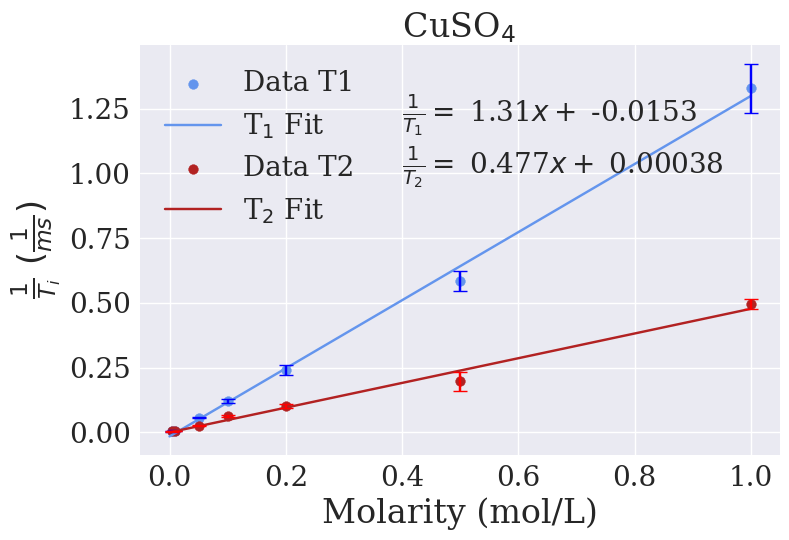

In [568]:
molarity = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1])
inv_t1 = 1/cuso4_T1
inv_t1err = cuso4_T1_err/cuso4_T1 * inv_t1
inv_t2 = 1/cuso4_T2
inv_t2err = cuso4_T2_err/cuso4_T2 * inv_t2


output = inv_T_plot(molarity, inv_t1, inv_t1err, inv_t2, inv_t2err)
output.set_tight_layout(True)
output.savefig(figure_directory + 'CuSO4_linear.pgf')


In [569]:
print(' [0.005M, 0.01M, 0.05M, 0.1M, 0.2M, 0.5M, 1M]\n')
print('T1: ' + str(cuso4_T1))
print('T1err: ' + str(cuso4_T1_err))
print(' \n[0.005M, 0.01M, 0.05M, 0.1M, 0.2M, 0.5M, 1M]\n')
print('T2: ' + str(cuso4_T2))
print('T2err: ' + str(cuso4_T2_err))

 [0.005M, 0.01M, 0.05M, 0.1M, 0.2M, 0.5M, 1M]

T1: [239.71789236 144.24982001  17.39463165   8.21115026   4.14856943
   1.71069652   0.7532348 ]
T1err: [37.53875573 33.18999228  0.73119519  0.5803455   0.31928684  0.11036477
  0.05358089]
 
[0.005M, 0.01M, 0.05M, 0.1M, 0.2M, 0.5M, 1M]

T2: [250.94834551 194.11676333  37.91392888  16.07038989   9.79447914
   5.08168431   2.01769776]
T2err: [20.08951642 26.67084905  1.06704834  0.84303288  0.73921445  0.90252055
  0.07929528]


In [605]:
def groupPlot1(data, title='CuSO$_4$ T$_1$ Overlay',xlab = 'Delay Time (ms)', ylab = 'Pulse Amplitude (V)'  ):    
    df = pd.read_csv(data)

    time1 = df["0.005t"].to_numpy()
    time2 = df["0.01t"].to_numpy()
    time3 = df["0.05t"].to_numpy()
    time4 = df["0.1t"].to_numpy()
    time5 = df["0.2t"].to_numpy()
    time6 = df["0.5t"].to_numpy()
    time7 = df["1t"].to_numpy()

    amp1 = df["0.005A"].to_numpy()
    amp2 = df["0.01A"].to_numpy()
    amp3 = df["0.05A"].to_numpy()
    amp4 = df["0.1A"].to_numpy()
    amp5 = df["0.2A"].to_numpy()
    amp6 = df["0.5A"].to_numpy()
    amp7 = df["1A"].to_numpy()

    time1 = time1[~np.isnan(time1)]
    time2 = time2[~np.isnan(time2)]
    time3 = time3[~np.isnan(time3)]
    time4 = time4[~np.isnan(time4)]
    time5 = time5[~np.isnan(time5)]
    time6 = time6[~np.isnan(time6)]
    time7 = time7[~np.isnan(time7)]

  

    amp1 = amp1[~np.isnan(amp1)]
    amp2 = amp2[~np.isnan(amp2)]
    amp3 = amp3[~np.isnan(amp3)]
    amp4 = amp4[~np.isnan(amp4)]
    amp5 = amp5[~np.isnan(amp5)]
    amp6 = amp6[~np.isnan(amp6)]
    amp7 = amp7[~np.isnan(amp7)]


    inital_params1 = [8.7, 200, 0.32]
    inital_params2 = [8.7, 100, 0.32]
    inital_params3 = [8.7, 20, 0.32]
    inital_params4 = [8.7, 10, 0.32]
    inital_params5 = [8.7, 10, 0.32]
    inital_params6 = [8.7, 3, 0.32]
    inital_params7 = [8.7, 1, 0.32]

    fit_t1, pcov1 = scipy.optimize.curve_fit(t1_func, time1,amp1, p0 = inital_params1)
    fit_t2, pcov2 = scipy.optimize.curve_fit(t1_func, time2,amp2, p0 = inital_params2)
    fit_t3, pcov3 = scipy.optimize.curve_fit(t1_func, time3,amp3, p0 = inital_params3)
    fit_t4, pcov4 = scipy.optimize.curve_fit(t1_func, time4,amp4, p0 = inital_params4)
    fit_t5, pcov5 = scipy.optimize.curve_fit(t1_func, time5,amp5, p0 = inital_params5)
    fit_t6, pcov6 = scipy.optimize.curve_fit(t1_func, time6,amp6, p0 = inital_params6)
    fit_t7, pcov7 = scipy.optimize.curve_fit(t1_func, time7,amp7, p0 = inital_params7)

    x_fit1 = np.linspace(time1.min(),time1.max(), 100)
    x_fit2 = np.linspace(time2.min(),time2.max(), 100)
    x_fit3 = np.linspace(time3.min(),time3.max(), 100)
    x_fit4 = np.linspace(time4.min(),time4.max(), 100)
    x_fit5 = np.linspace(time5.min(),time5.max(), 100)
    x_fit6 = np.linspace(time6.min(),time6.max(), 100)
    x_fit7 = np.linspace(time7.min(),time7.max(), 100)

    y_1 = t1_func(x_fit1, fit_t1[0], fit_t1[1], fit_t1[2])
    y_2 = t1_func(x_fit2, fit_t2[0], fit_t2[1], fit_t2[2])
    y_3 = t1_func(x_fit3, fit_t3[0], fit_t3[1], fit_t3[2])
    y_4 = t1_func(x_fit4, fit_t4[0], fit_t4[1], fit_t4[2])
    y_5 = t1_func(x_fit5, fit_t5[0], fit_t5[1], fit_t5[2])
    y_6 = t1_func(x_fit6, fit_t6[0], fit_t6[1], fit_t6[2])
    y_7 = t1_func(x_fit7, fit_t7[0], fit_t7[1], fit_t7[2])

    fig, ax = plt.subplots()

    ax.scatter(time1, amp1, label = '0.005 M')
    ax.scatter(time2, amp2, label = '0.01 M')
    ax.scatter(time3, amp3, label = '0.05 M')
    ax.scatter(time4, amp4, label = '0.1 M')
    ax.scatter(time5, amp5, label = '0.2 M')
    ax.scatter(time6, amp6, label = '0.5 M')
    ax.scatter(time7, amp7, label = '1.0 M', color = 'cornflowerblue')

    ax.plot(x_fit1, y_1, label = '0.005 M')
    ax.plot(x_fit2, y_2, label = '0.01 M')
    ax.plot(x_fit3, y_3, label = '0.05 M')
    ax.plot(x_fit4, y_4, label = '0.1 M')
    ax.plot(x_fit5, y_5, label = '0.2 M')
    ax.plot(x_fit6, y_6, label = '0.5 M')
    ax.plot(x_fit7, y_7, label = '1.0 M', color = 'cornflowerblue')



    ax.set_title(title, fontsize = 24)
    ax.set_xlabel(xlab, fontsize = 24)
    ax.set_ylabel(ylab, fontsize = 24)
    ax.tick_params(axis='both', labelsize = 20)
    ax.legend(ncol=2)

    return fig



def groupPlot2(data, title='CuSO$_4$ T$_2$ Overlay',xlab = 'Time (ms)', ylab = 'Pulse Amplitude (V)'  ):    
    df = pd.read_csv(data)

    time1 = df["0.005t"].to_numpy()
    time2 = df["0.01t"].to_numpy()
    time3 = df["0.05t"].to_numpy()
    time4 = df["0.1t"].to_numpy()
    time5 = df["0.2t"].to_numpy()
    time6 = df["0.5t"].to_numpy()
    time7 = df["1t"].to_numpy()

    amp1 = df["0.005A"].to_numpy()
    amp2 = df["0.01A"].to_numpy()
    amp3 = df["0.05A"].to_numpy()
    amp4 = df["0.1A"].to_numpy()
    amp5 = df["0.2A"].to_numpy()
    amp6 = df["0.5A"].to_numpy()
    amp7 = df["1A"].to_numpy()

    time1 = time1[~np.isnan(time1)]
    time2 = time2[~np.isnan(time2)]
    time3 = time3[~np.isnan(time3)]
    time4 = time4[~np.isnan(time4)]
    time5 = time5[~np.isnan(time5)]
    time6 = time6[~np.isnan(time6)]
    time7 = time7[~np.isnan(time7)]
    amp1 = amp1[~np.isnan(amp1)]
    amp2 = amp2[~np.isnan(amp2)]
    amp3 = amp3[~np.isnan(amp3)]
    amp4 = amp4[~np.isnan(amp4)]
    amp5 = amp5[~np.isnan(amp5)]
    amp6 = amp6[~np.isnan(amp6)]
    amp7 = amp7[~np.isnan(amp7)]


    inital_params1 = [4.7, 200, 0.32]
    inital_params2 = [4.7, 100, 0.32]
    inital_params3 = [4.7, 20, 0.32]
    inital_params4 = [4.7, 10, 0.32]
    inital_params5 = [4.7, 10, 0.32]
    inital_params6 = [4.7, 3, 0.32]
    inital_params7 = [4.7, 1, 0.32]

    fit_t1, pcov1 = scipy.optimize.curve_fit(t2_func, time1,amp1, p0 = inital_params1)
    fit_t2, pcov2 = scipy.optimize.curve_fit(t2_func, time2,amp2, p0 = inital_params2)
    fit_t3, pcov3 = scipy.optimize.curve_fit(t2_func, time3,amp3, p0 = inital_params3)
    fit_t4, pcov4 = scipy.optimize.curve_fit(t2_func, time4,amp4, p0 = inital_params4)
    fit_t5, pcov5 = scipy.optimize.curve_fit(t2_func, time5,amp5, p0 = inital_params5)
    fit_t6, pcov6 = scipy.optimize.curve_fit(t2_func, time6,amp6, p0 = inital_params6)
    fit_t7, pcov7 = scipy.optimize.curve_fit(t2_func, time7,amp7, p0 = inital_params7)

    x_fit1 = np.linspace(time1.min(),time1.max(), 100)
    x_fit2 = np.linspace(time2.min(),time2.max(), 100)
    x_fit3 = np.linspace(time3.min(),time3.max(), 100)
    x_fit4 = np.linspace(time4.min(),time4.max(), 100)
    x_fit5 = np.linspace(time5.min(),time5.max(), 100)
    x_fit6 = np.linspace(time6.min(),time6.max(), 100)
    x_fit7 = np.linspace(time7.min(),time7.max(), 100)

    y_1 = t2_func(x_fit1, fit_t1[0], fit_t1[1], fit_t1[2])
    y_2 = t2_func(x_fit2, fit_t2[0], fit_t2[1], fit_t2[2])
    y_3 = t2_func(x_fit3, fit_t3[0], fit_t3[1], fit_t3[2])
    y_4 = t2_func(x_fit4, fit_t4[0], fit_t4[1], fit_t4[2])
    y_5 = t2_func(x_fit5, fit_t5[0], fit_t5[1], fit_t5[2])
    y_6 = t2_func(x_fit6, fit_t6[0], fit_t6[1], fit_t6[2])
    y_7 = t2_func(x_fit7, fit_t7[0], fit_t7[1], fit_t7[2])

    fig, ax = plt.subplots()

    ax.scatter(time1, amp1, label = '0.005 M')
    ax.scatter(time2, amp2, label = '0.01 M')
    ax.scatter(time3, amp3, label = '0.05 M')
    ax.scatter(time4, amp4, label = '0.1 M')
    ax.scatter(time5, amp5, label = '0.2 M')
    ax.scatter(time6, amp6, label = '0.5 M')
    ax.scatter(time7, amp7, label = '1.0 M', color = 'cornflowerblue')

    ax.plot(x_fit1, y_1, label = '0.005 M')
    ax.plot(x_fit2, y_2, label = '0.01 M')
    ax.plot(x_fit3, y_3, label = '0.05 M')
    ax.plot(x_fit4, y_4, label = '0.1 M')
    ax.plot(x_fit5, y_5, label = '0.2 M')
    ax.plot(x_fit6, y_6, label = '0.5 M')
    ax.plot(x_fit7, y_7, label = '1.0 M', color = 'cornflowerblue')



    ax.set_title(title, fontsize = 24)
    ax.set_xlabel(xlab, fontsize = 24)
    ax.set_ylabel(ylab, fontsize = 24)
    ax.tick_params(axis='both', labelsize = 20)
    ax.legend(ncol=2)

    return fig

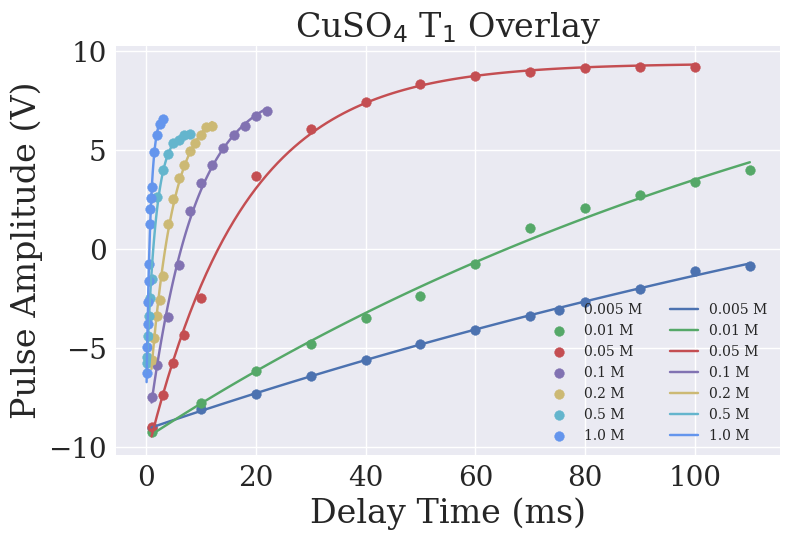

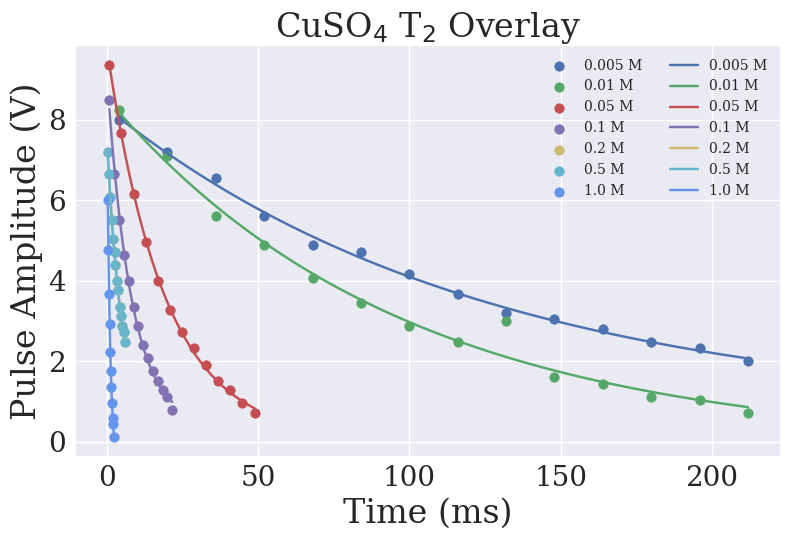

In [606]:
t1_summery = groupPlot1("T1_summery.csv")
t1_summery.set_tight_layout(True)
t1_summery.savefig(figure_directory + 'summery_t1.pgf')

t2_summery = groupPlot2("T2_summery.csv")
t2_summery.set_tight_layout(True)
t2_summery.savefig(figure_directory + 'summery_t2.pgf')